In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pwd

'C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1'

In [5]:
df = pd.read_csv('C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\DATA\\gene_expression.csv')

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


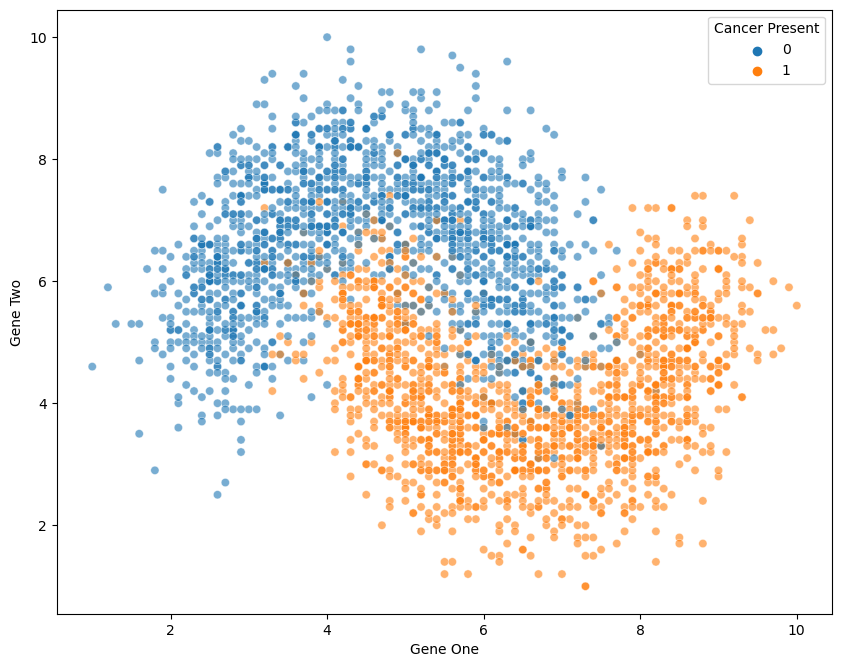

In [11]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data = df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6);

(4.0, 8.0)

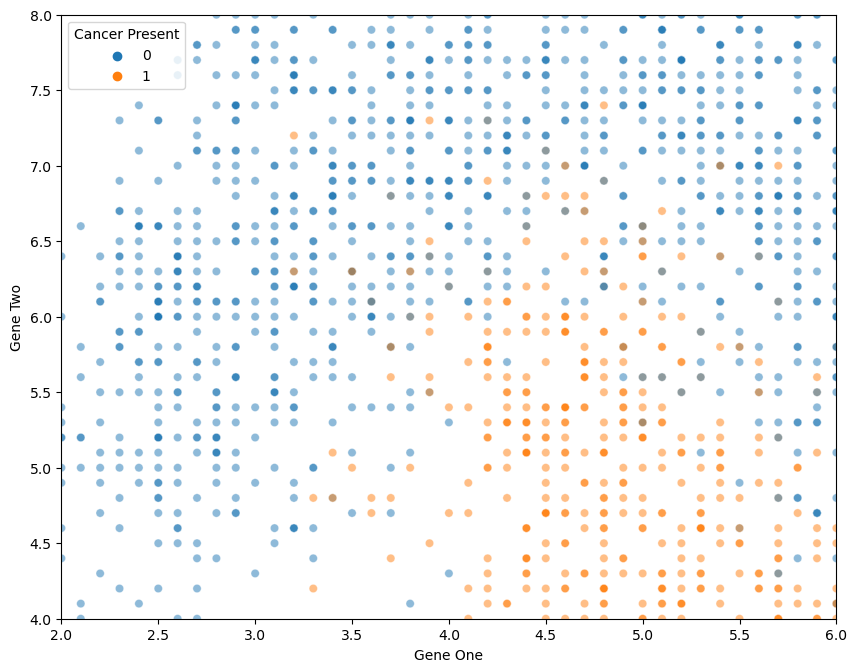

In [14]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data = df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5)
plt.xlim(2,6)
plt.ylim(4,8)


(4.0, 8.0)

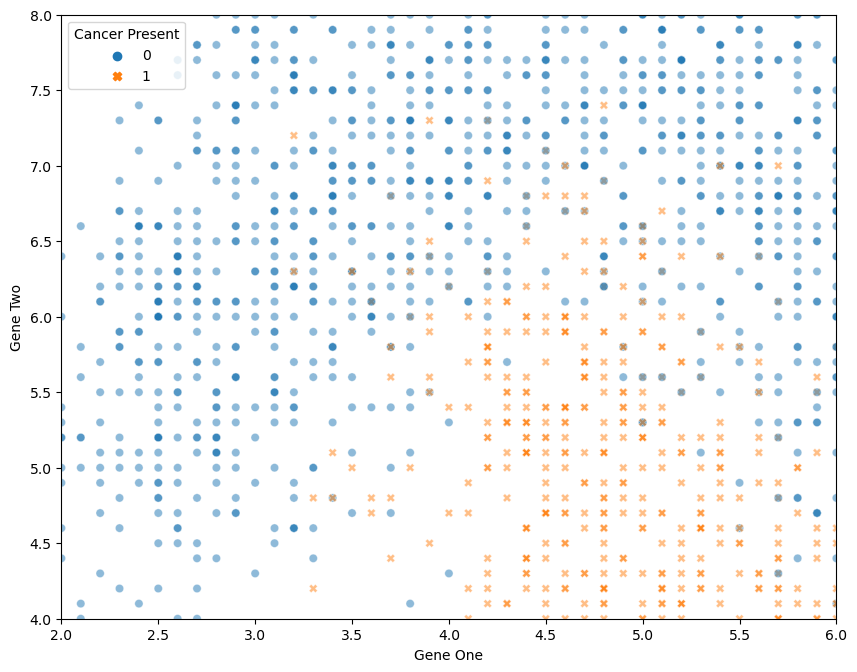

In [15]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data = df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5, style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

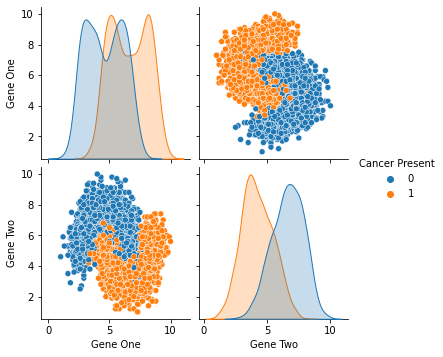

In [19]:
sns.pairplot(data=df, hue='Cancer Present');

In [20]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [26]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [27]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [31]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [33]:
accuracy_score(y_test, y_pred)

0.9166666666666666

МЕТОД ЛОКТЯ

In [34]:
test_error_rates = []

for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

In [35]:
test_error_rates

[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

Text(0.5, 0, 'K ближайших соседей')

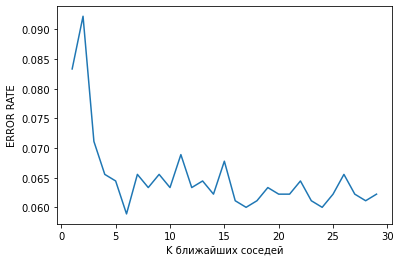

In [39]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K ближайших соседей')


(0.0, 0.07)

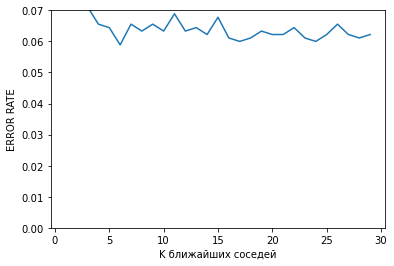

In [40]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K ближайших соседей')
plt.ylim(0,0.07)

In [41]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [42]:
operation = [('scaler',scaler),('knn',knn)]

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(operation)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
k_values = list(range(1,20))

In [47]:
param_grid = {'knn__n_neighbors':k_values}

In [48]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [49]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [51]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [53]:
full_pred = full_cv_classifier.predict(X_test)

In [54]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [55]:
patient = [[3.8,6.4]]

In [56]:
full_cv_classifier.predict(patient)

array([0], dtype=int64)

In [57]:
full_cv_classifier.predict_proba(patient)

array([[0.6875, 0.3125]])

In [59]:
patient_two = [[5.5,7.3]]

In [60]:
full_cv_classifier.predict(patient_two)

array([1], dtype=int64)

In [61]:
full_cv_classifier.predict_proba(patient_two)

array([[0.3125, 0.6875]])